- <u> ***Import libraries*** </u>

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set()

- <u>***Importing data***</u>

In [73]:
hs_data = pd.read_csv("London_Housing_Data.csv")
hs_data.head() 

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


- <u> ***Checking shape*** </u>

In [74]:
hs_data.shape


(13549, 6)

- <u> ***Checking for null values*** </u>

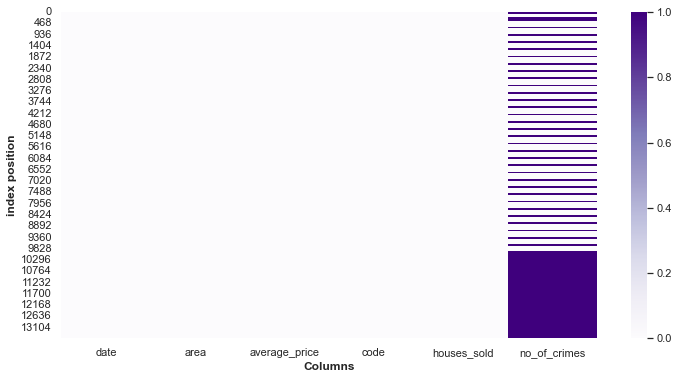

In [75]:
#snsheatmap
plt.figure(figsize = (12, 6))
sns.heatmap(hs_data.isnull(),
            cmap='Purples')
plt.ylabel('index position', fontweight = 'bold')
plt.xlabel('Columns', fontweight = 'bold')
plt.show()

- <u> ***Filling_values*** </u>

In [76]:
max_hs = hs_data.houses_sold.max()
max_hs

132163.0

In [77]:
min_hs = hs_data.houses_sold.min()
min_hs

2.0

In [78]:
max_crime = hs_data.no_of_crimes.max()
max_crime 

7461.0

In [79]:
mean_crime = hs_data.no_of_crimes.mean()
mean_crime

2158.3520634493884

In [80]:
hs_data['no_of_crimes'].fillna(mean_crime, inplace=True)
hs_data.isnull().sum()


date              0
area              0
average_price     0
code              0
houses_sold      94
no_of_crimes      0
dtype: int64

In [81]:
#replacing 0 values with the mean of the column
hs_data.loc[hs_data['no_of_crimes'] == 0, 'no_of_crimes'] = mean_crime


In [82]:
#checking info on the crime column
hs_data.no_of_crimes.describe()

count    13549.000000
mean      2174.919236
std        640.881790
min          3.000000
25%       2079.000000
50%       2158.352063
75%       2210.000000
max       7461.000000
Name: no_of_crimes, dtype: float64

In [83]:
#replacing null values in the housing column
mean_hs = hs_data.houses_sold.mean()
hs_data['houses_sold'].fillna(mean_hs, inplace=True)

- <u> ***Checking for null values*** </u>

In [84]:
hs_data.isnull().sum()

date             0
area             0
average_price    0
code             0
houses_sold      0
no_of_crimes     0
dtype: int64

- <u> ***Using heat map to visualize missing data*** </u>

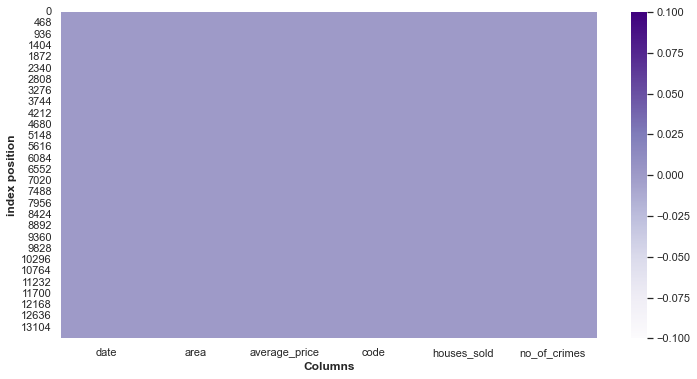

In [85]:
plt.figure(figsize = (12, 6))
sns.heatmap(hs_data.isnull(),
            cmap='Purples')
plt.ylabel('index position', fontweight = 'bold')
plt.xlabel('Columns', fontweight = 'bold')
plt.show()

#All null values have been filled.

- <u> ***Converting to whole numbers*** </u>

In [86]:
#converting houses_sold values into whole numbers 
hs_data['houses_sold'] = hs_data['houses_sold'].astype(int)
hs_data

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17,2158.352063
1,2/1/1995,city of london,82203,E09000001,7,2158.352063
2,3/1/1995,city of london,79121,E09000001,14,2158.352063
3,4/1/1995,city of london,77101,E09000001,7,2158.352063
4,5/1/1995,city of london,84409,E09000001,10,2158.352063
...,...,...,...,...,...,...
13544,9/1/2019,england,249942,E92000001,64605,2158.352063
13545,10/1/2019,england,249376,E92000001,68677,2158.352063
13546,11/1/2019,england,248515,E92000001,67814,2158.352063
13547,12/1/2019,england,250410,E92000001,3893,2158.352063


In [87]:
#converting 'no_of_crimes' values into whole numbers 
hs_data['no_of_crimes'] = hs_data['no_of_crimes'].astype(int)
hs_data

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17,2158
1,2/1/1995,city of london,82203,E09000001,7,2158
2,3/1/1995,city of london,79121,E09000001,14,2158
3,4/1/1995,city of london,77101,E09000001,7,2158
4,5/1/1995,city of london,84409,E09000001,10,2158
...,...,...,...,...,...,...
13544,9/1/2019,england,249942,E92000001,64605,2158
13545,10/1/2019,england,249376,E92000001,68677,2158
13546,11/1/2019,england,248515,E92000001,67814,2158
13547,12/1/2019,england,250410,E92000001,3893,2158


In [88]:
hs_data.dtypes

date             object
area             object
average_price     int64
code             object
houses_sold       int32
no_of_crimes      int32
dtype: object

- <u> ***Changing date (object) into date_time format*** </u>

In [89]:
hs_data.date = pd.to_datetime(hs_data.date)
hs_data.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold               int32
no_of_crimes              int32
dtype: object

- <u> ***Adding new column ('Year')*** </u>

In [90]:
#data['newcolumn'] = df.previousDate_column.dt.year
hs_data['year'] = hs_data.date.dt.year 

In [91]:
hs_data.dtypes 

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold               int32
no_of_crimes              int32
year                      int64
dtype: object

In [92]:
hs_data['year']

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
13544    2019
13545    2019
13546    2019
13547    2019
13548    2020
Name: year, Length: 13549, dtype: int64

- <u> ***Adding monthly column*** </u>

In [93]:
hs_data['month'] = hs_data.date.dt.month 
hs_data['month']

0         1
1         2
2         3
3         4
4         5
         ..
13544     9
13545    10
13546    11
13547    12
13548     1
Name: month, Length: 13549, dtype: int64

- <u> ***Yearly info*** </u>

In [94]:
total_avg_year = hs_data.groupby('year')['average_price'].sum()
total_avg_year.sort_values(ascending = False)

year
2017    253788627
2018    252309964
2019    248430596
2016    245637609
2015    227532294
2014    209632532
2013    180678365
2012    167081131
2011    159202335
2010    155281949
2008    155238645
2007    154409911
2009    140020324
2006    134623679
2005    125989837
2004    121286549
2003    110753759
2002     98382995
2001     84743472
2000     75588899
1999     61698333
1998     55146914
1997     48393909
1996     42750399
1995     40975327
2020     20849849
Name: average_price, dtype: int64

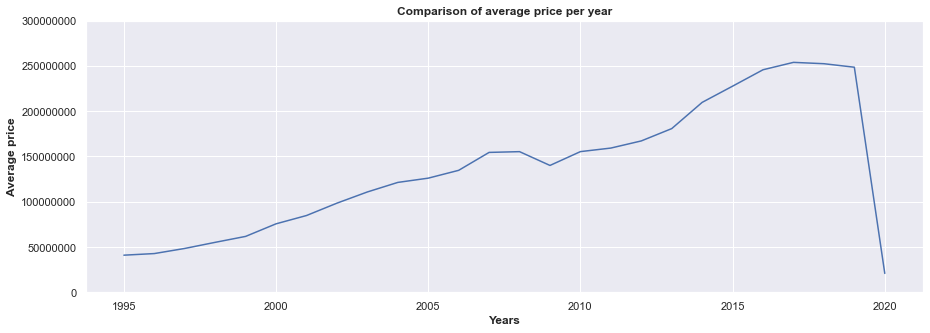

In [95]:
#Average prices per year 
plt.figure(figsize = (15,5))
plt.plot(total_avg_year.index,
         total_avg_year.values)
plt.ylabel('Average price', fontweight = 'bold')
plt.xlabel('Years', fontweight = 'bold')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Comparison of average price per year', fontsize = 12, fontweight = 'bold')
plt.show()

In [96]:
#Highest house price sold per year
avg_max_year_price = hs_data.groupby('year').average_price.max()
avg_max_year_price.sort_values(ascending = False)

year
2018    1463378
2017    1412255
2014    1365050
2016    1357231
2015    1353679
2019    1294113
2013    1217729
2020    1178166
2012    1077366
2011     959520
2010     884674
2008     832753
2007     830950
2009     782459
2006     644541
2004     559286
2005     555847
2002     497538
2003     488704
2001     451028
2000     397353
1999     354241
1998     277600
1997     265112
1996     223197
1995     200722
Name: average_price, dtype: int64

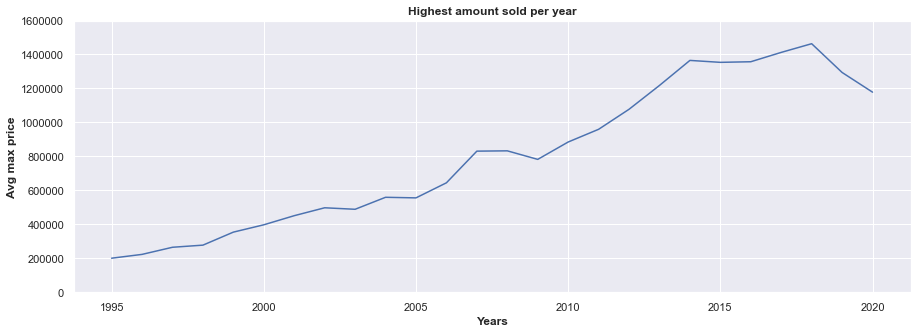

In [97]:
#Plotting line graph to picture difference in price over the years.
plt.figure(figsize = (15,5))
plt.plot(avg_max_year_price.index,
         avg_max_year_price.values)
plt.ylabel('Avg max price', fontweight = 'bold')
plt.xlabel('Years', fontweight = 'bold')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Highest amount sold per year', fontsize = 12, fontweight = 'bold')
plt.show()

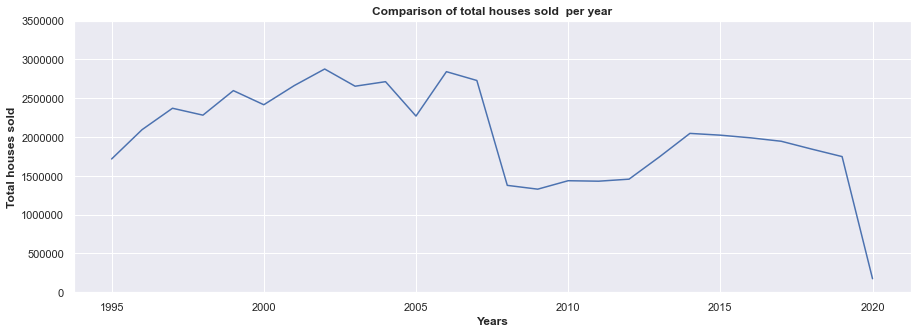

In [98]:
#Total houses sold per year
total_hs_sold = hs_data.groupby('year')['houses_sold'].sum()

plt.figure(figsize = (15,5))
plt.plot(total_hs_sold.index,
         total_hs_sold.values)
plt.ylabel('Total houses sold', fontweight = 'bold')
plt.xlabel('Years', fontweight = 'bold')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Comparison of total houses sold  per year', fontsize = 12, fontweight = 'bold')
plt.show()

In [99]:
#checking on 2020 info due to low values generated 
hs_data[hs_data['year'] == 2020]

,date,area,average_price,code,houses_sold,no_of_crimes,year,month
300,2020-01-01,city of london,775309,E09000001,3893,2158,2020,1
601,2020-01-01,barking and dagenham,301057,E09000002,3893,1680,2020,1
902,2020-01-01,barnet,520682,E09000003,3893,2621,2020,1
1203,2020-01-01,bexley,331683,E09000004,3893,1616,2020,1
1504,2020-01-01,brent,408523,E09000005,3893,2510,2020,1
1805,2020-01-01,bromley,436757,E09000006,3893,2138,2020,1
2106,2020-01-01,camden,810298,E09000007,3893,3214,2020,1
2407,2020-01-01,croydon,368662,E09000008,3893,3047,2020,1
2708,2020-01-01,ealing,473268,E09000009,3893,2697,2020,1
3012,2020-01-01,enfield,391365,E09000010,3893,2590,2020,1


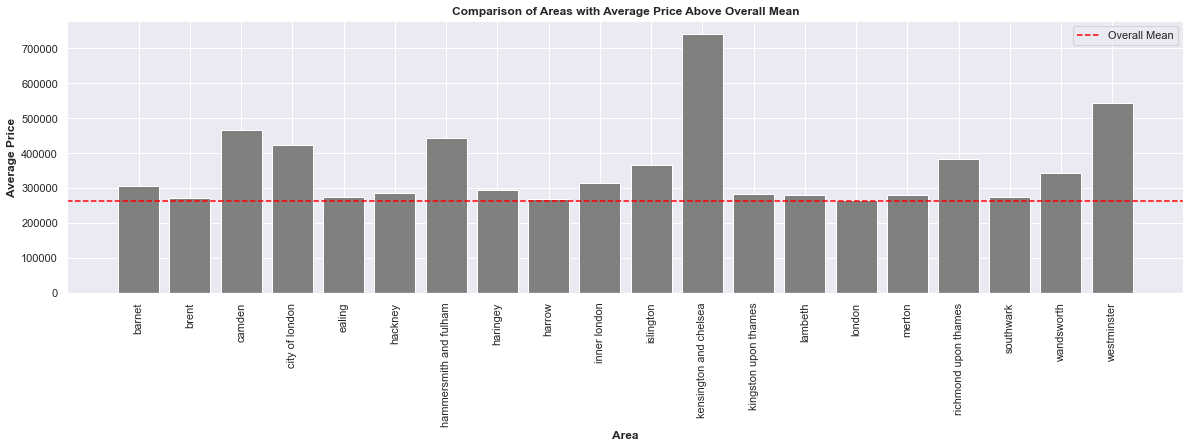

In [100]:
# Calculate overall total average price mean
overall_mean = hs_data['average_price'].mean()
above_mean_areas = hs_data.groupby('area')['average_price'].mean().loc[lambda x: x > overall_mean]

plt.figure(figsize=(20, 5))
plt.bar(above_mean_areas.index, above_mean_areas.values, color = 'Grey')
plt.axhline(overall_mean, color='red', linestyle='--', label='Overall Mean')
plt.xlabel('Area', fontweight = 'bold')
plt.ylabel('Average Price', fontweight ='bold')
plt.title('Comparison of Areas with Average Price Above Overall Mean', fontweight = 'bold', fontsize = 12)
plt.legend()
plt.xticks(rotation=90)
plt.show()

- *looking at any correleations over the years*

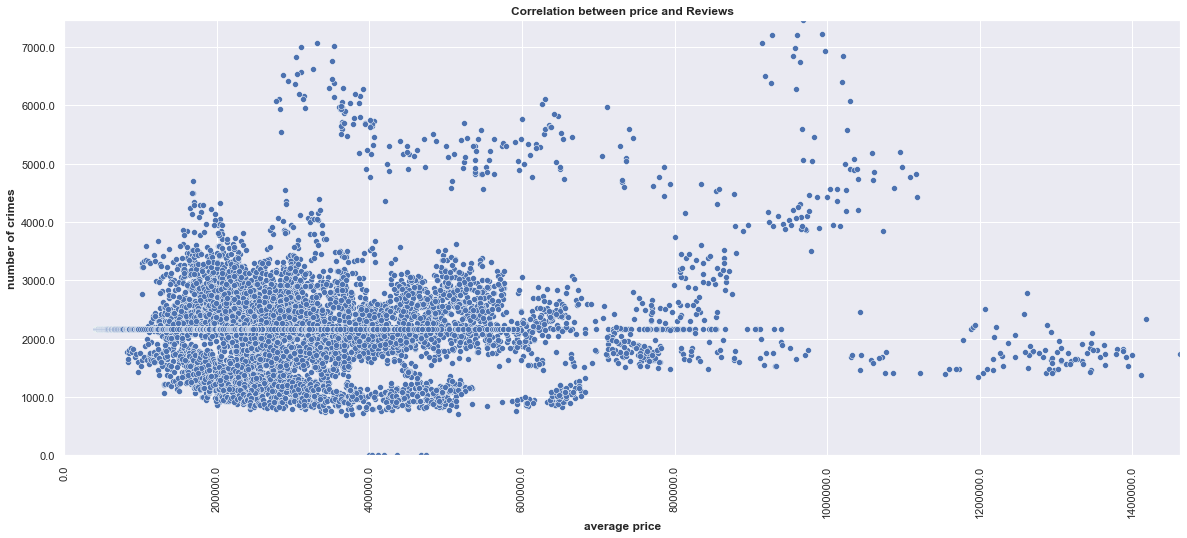

In [101]:
#correlation between average price and crime.

plt.figure(figsize = (20,8))
sns.scatterplot(x='average_price', y='no_of_crimes', data = hs_data)
plt.xlabel('average price', weight = 'bold')
plt.ylabel('number of crimes', weight = 'bold')
plt.yticks(ticks= plt.yticks()[0], labels=plt.yticks()[0])
plt.xticks(ticks = plt.xticks()[0], labels =plt.xticks()[0])
plt.xticks(rotation=90)
plt.xlim(0,hs_data['average_price'].max())
plt.ylim(0,hs_data['no_of_crimes'].max())
plt.title('Correlation between price and Reviews', fontsize = 12, weight = 'bold')
plt.show()

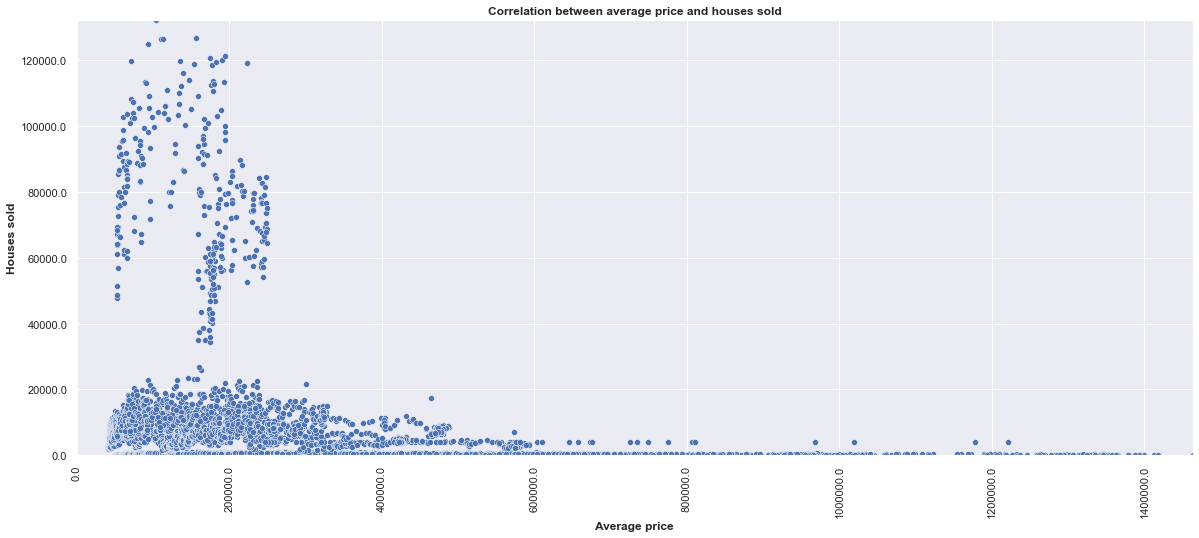

In [102]:
#correlation between average price and houses sold.

plt.figure(figsize = (20,8))
sns.scatterplot(x='average_price', y='houses_sold', data = hs_data)
plt.xlabel('Average price', weight = 'bold')
plt.ylabel('Houses sold', weight = 'bold')
plt.yticks(ticks= plt.yticks()[0], labels=plt.yticks()[0])
plt.xticks(ticks = plt.xticks()[0], labels =plt.xticks()[0])
plt.xticks(rotation=90)
plt.xlim(0,hs_data['average_price'].max())
plt.ylim(0,hs_data['houses_sold'].max())
plt.title('Correlation between average price and houses sold', fontsize = 12, weight = 'bold')
plt.show()

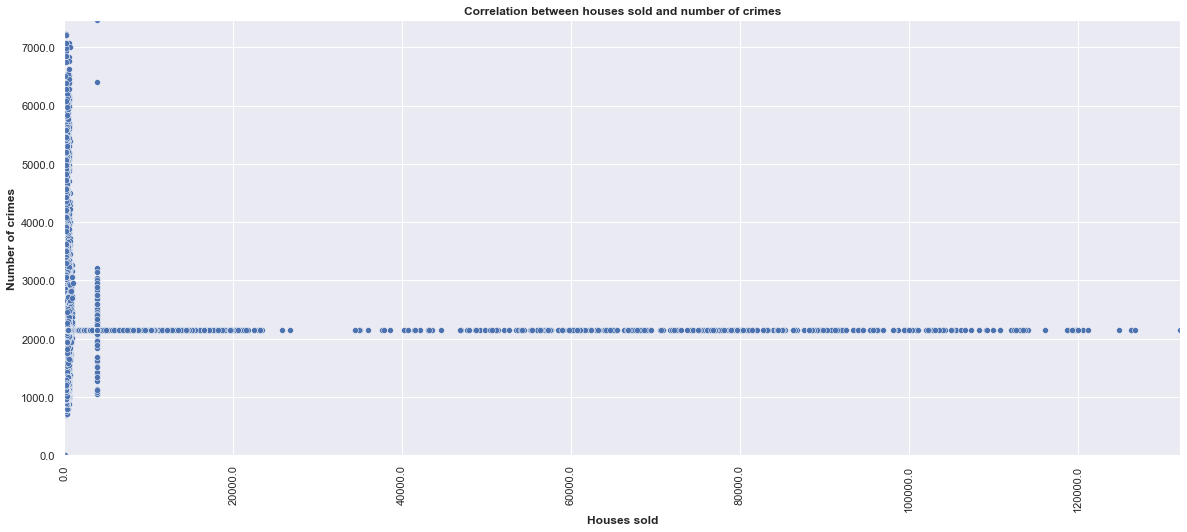

In [103]:
#correlation between houses sold and number of crimes.

plt.figure(figsize = (20,8))
sns.scatterplot(x='houses_sold', y='no_of_crimes', data = hs_data)
plt.xlabel('Houses sold', weight = 'bold')
plt.ylabel('Number of crimes', weight = 'bold')
plt.yticks(ticks= plt.yticks()[0], labels=plt.yticks()[0])
plt.xticks(ticks = plt.xticks()[0], labels =plt.xticks()[0])
plt.xticks(rotation=90)
plt.xlim(0,hs_data['houses_sold'].max())
plt.ylim(0,hs_data['no_of_crimes'].max())
plt.title('Correlation between houses sold and number of crimes', fontsize = 12, weight = 'bold')
plt.show()

- <u>***Monhtly info***</u>

In [104]:
#checking for any correlation between months and houses sold 
months_hs = hs_data.groupby('month')['houses_sold'].sum()
months_hs

month
1     3511843
2     3431390
3     4254574
4     3995346
5     4402064
6     4790590
7     5006940
8     5006415
9     4539468
10    4661097
11    4563825
12    4596081
Name: houses_sold, dtype: int32

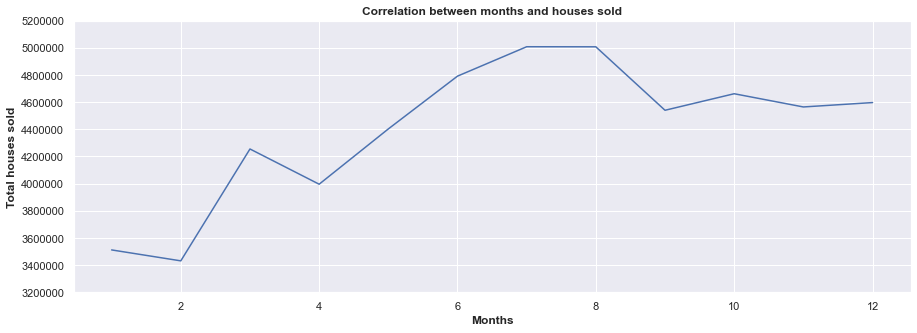

In [105]:
plt.figure(figsize = (15,5))
plt.plot(months_hs.index,
         months_hs.values)
plt.ylabel('Total houses sold', fontweight = 'bold')
plt.xlabel('Months', fontweight = 'bold')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Correlation between months and houses sold', fontsize = 12, fontweight = 'bold')
plt.show()

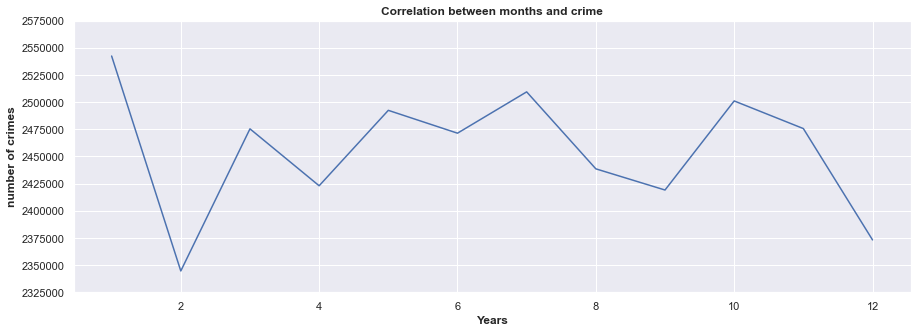

In [106]:
months_crime = hs_data.groupby('month')['no_of_crimes'].sum()
plt.figure(figsize = (15,5))
plt.plot(months_crime.index,
         months_crime.values)
plt.ylabel('number of crimes', fontweight = 'bold')
plt.xlabel('Years', fontweight = 'bold')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Correlation between months and crime', fontsize = 12, fontweight = 'bold')
plt.show()

- <u> ***Checking info per location*** </u>
    - houses sold

In [107]:
#checking for distinct locactions in the area column 
hs_data.area.unique()

array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'tower hamlets', 'greenwich', 'hackney', 'south east',
       'hammersmith and fulham', 'haringey', 'harrow', 'havering',
       'hillingdon', 'hounslow', 'islington', 'kensington and chelsea',
       'kingston upon thames', 'lambeth', 'lewisham', 'merton', 'newham',
       'redbridge', 'richmond upon thames', 'southwark', 'sutton',
       'waltham forest', 'wandsworth', 'westminster', 'inner london',
       'outer london', 'north east', 'north west', 'yorks and the humber',
       'east midlands', 'west midlands', 'east of england', 'london',
       'south west', 'england'], dtype=object)

In [108]:
#checking number of houses sold per area
area_hs_year = hs_data.groupby('area')['houses_sold'].sum().sort_values(ascending = False).head(10)
area_hs_year

area
england                 23085423
south east               4206795
london                   3142164
north west               2903066
east of england          2817586
south west               2647447
yorks and the humber     2191548
west midlands            2136764
east midlands            2041510
outer london             1904795
Name: houses_sold, dtype: int32

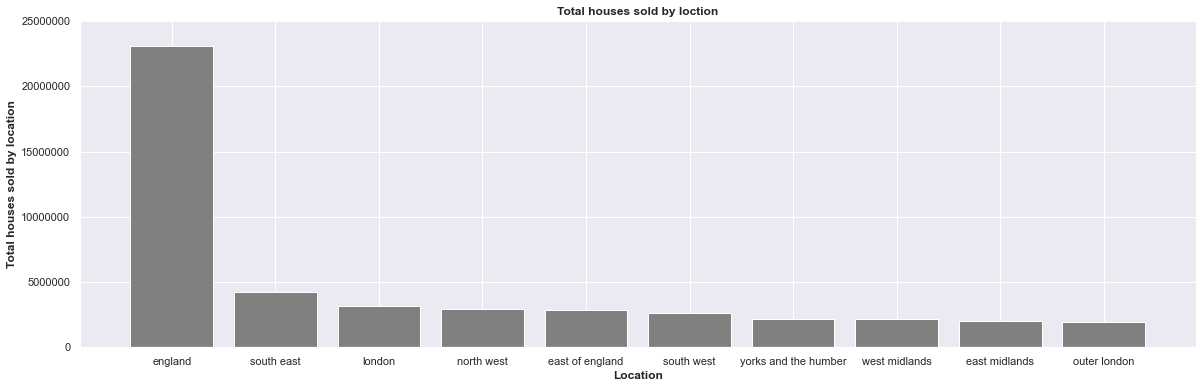

In [109]:
#barchart
plt.figure(figsize =(20,6))
plt.bar(x = area_hs_year.index ,
        height =area_hs_year.values,
        color = 'Grey')
plt.ylabel('Total houses sold by location', fontweight ='bold')
plt.xlabel('Location', fontweight ='bold')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Total houses sold by loction', fontsize = 12, fontweight = 'bold')
plt.show()

In [110]:
#England
England = hs_data[hs_data.area == 'england']
England.head(10)

,date,area,average_price,code,houses_sold,no_of_crimes,year,month
13248,1995-01-01,england,53203,E92000001,47639,2158,1995,1
13249,1995-02-01,england,53096,E92000001,47880,2158,1995,2
13250,1995-03-01,england,53201,E92000001,67025,2158,1995,3
13251,1995-04-01,england,53591,E92000001,56925,2158,1995,4
13252,1995-05-01,england,53678,E92000001,64192,2158,1995,5
13253,1995-06-01,england,53735,E92000001,72640,2158,1995,6
13254,1995-07-01,england,53901,E92000001,64242,2158,1995,7
13255,1995-08-01,england,53600,E92000001,69269,2158,1995,8
13256,1995-09-01,england,53309,E92000001,67251,2158,1995,9
13257,1995-10-01,england,52845,E92000001,61264,2158,1995,10


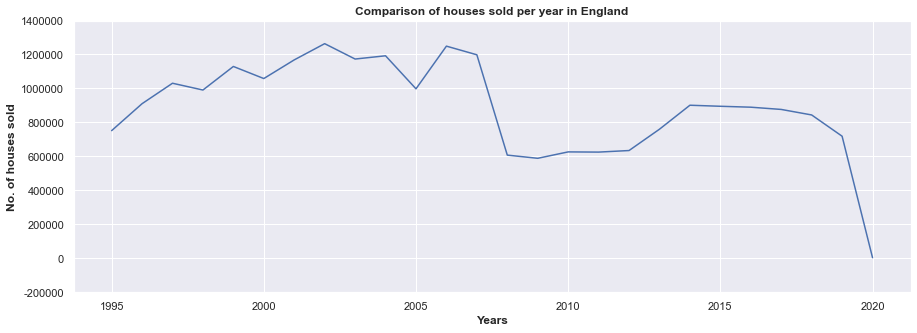

In [111]:
#line graph of houses sold in england
eng_hs_year = England.groupby('year')['houses_sold'].sum()

plt.figure(figsize = (15,5))
plt.plot(eng_hs_year.index,
         eng_hs_year.values)
plt.ylabel('No. of houses sold', fontweight = 'bold')
plt.xlabel('Years', fontweight = 'bold')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Comparison of houses sold per year in England', fontsize = 12, fontweight = 'bold')
plt.show()

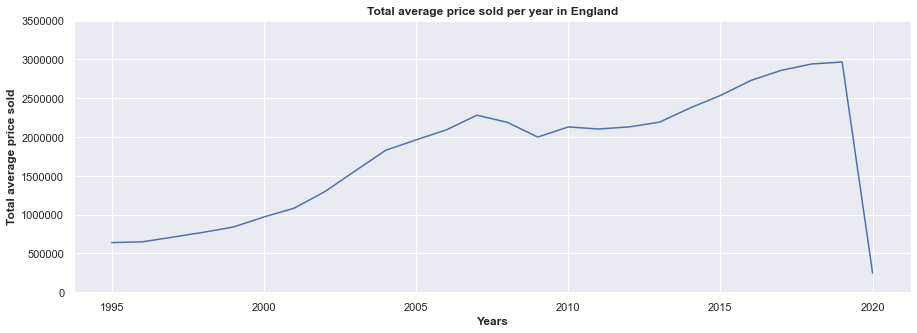

In [112]:
#line graph of total average price sold in england 
eng_avg_year = England.groupby('year')['average_price'].sum()

plt.figure(figsize = (15,5))
plt.plot(eng_avg_year.index,
         eng_avg_year.values)
plt.ylabel('Total average price sold', fontweight = 'bold')
plt.xlabel('Years', fontweight = 'bold')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Total average price sold per year in England', fontsize = 12, fontweight = 'bold')
plt.show()

> *comparison of top 3 houses sold areas:*
    > *(england, south east, london )*

In [113]:
# creating variables for south east and london
London = hs_data[hs_data['area'] == 'london']
South_east = hs_data[hs_data['area'] == 'south east']

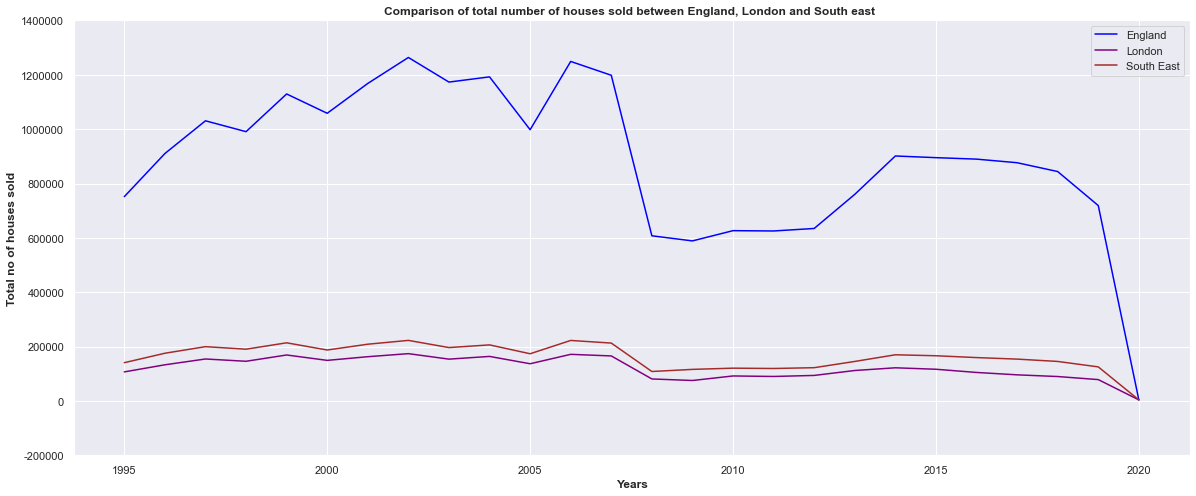

In [114]:
#no of houses sold
eng_hs_year = England.groupby('year')['houses_sold'].sum()
london_hs_year = London.groupby('year')['houses_sold'].sum()
SE_hs_year = South_east.groupby('year')['houses_sold'].sum()

plt.figure(figsize = (20,8))
plt.plot(eng_hs_year.index,
         eng_hs_year.values,
         color = 'Blue',
         label = 'England')
plt.plot(london_hs_year.index,
         london_hs_year.values,
         color = 'Purple',
         label = 'London')
plt.plot(SE_hs_year.index,
         SE_hs_year.values,
         color = 'Brown',
         label = 'South East')
plt.legend()
plt.ylabel('Total no of houses sold', fontweight = 'bold')
plt.xlabel('Years', fontweight = 'bold')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Comparison of total number of houses sold between England, London and South east ', fontsize = 12, fontweight = 'bold')
plt.show() 

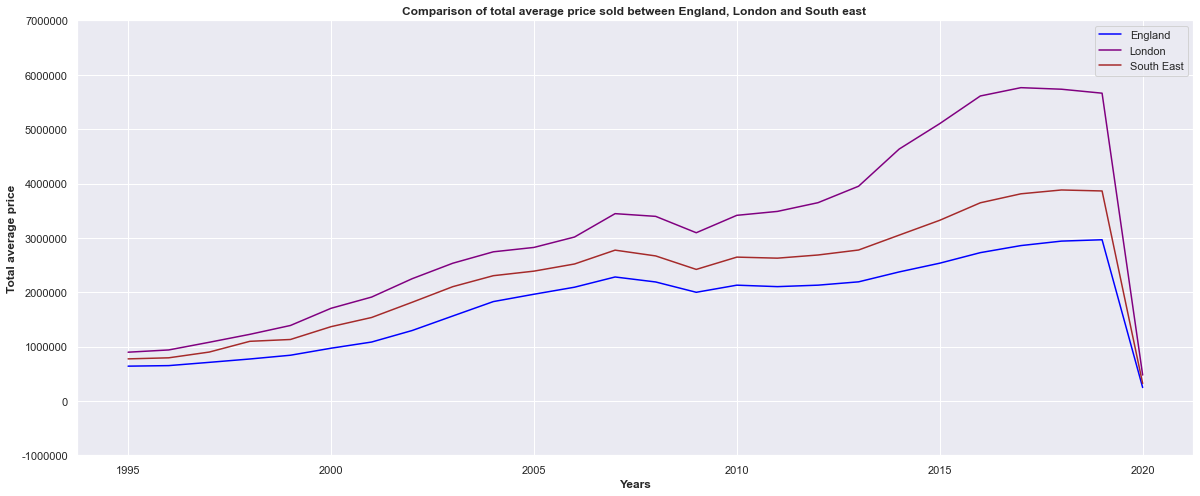

In [115]:
#difference in average prices 
eng_avg_year = England.groupby('year')['average_price'].sum()
london_avg_year = London.groupby('year')['average_price'].sum()
SE_avg_year = South_east.groupby('year')['average_price'].sum()

plt.figure(figsize = (20,8))
plt.plot(eng_avg_year.index,
         eng_avg_year.values,
         color = 'Blue',
         label = 'England')
plt.plot(london_avg_year.index,
         london_avg_year.values,
         color = 'Purple',
         label = 'London')
plt.plot(SE_avg_year.index,
         SE_avg_year.values,
         color = 'Brown',
         label = 'South East')
plt.legend()
plt.ylabel('Total average price', fontweight = 'bold')
plt.xlabel('Years', fontweight = 'bold')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Comparison of total average price sold between England, London and South east ', fontsize = 12, fontweight = 'bold')
plt.show() 

- average price 

In [116]:
#Checking the total average price sold by location.
area_avg_year = hs_data.groupby('area')['average_price'].sum().sort_values(ascending = False).head(10)
area_avg_year 

area
kensington and chelsea    223360171
westminster               163703647
camden                    140717774
hammersmith and fulham    133581350
city of london            127606718
richmond upon thames      115167404
islington                 109921503
wandsworth                103033564
inner london               94813321
barnet                     91802318
Name: average_price, dtype: int64

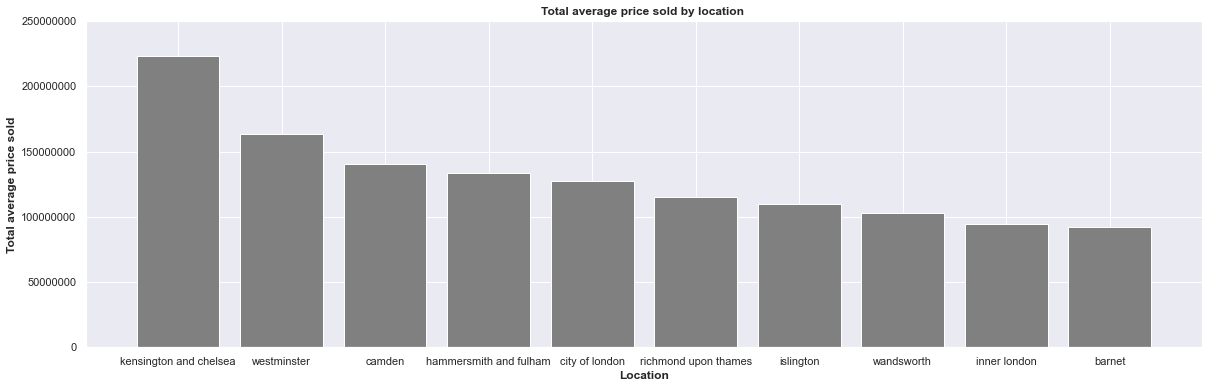

In [117]:
#barchart
plt.figure(figsize =(20,6))
plt.bar(x = area_avg_year.index ,
        height =area_avg_year.values,
        color = 'Grey')
plt.ylabel('Total average price sold', fontweight ='bold')
plt.xlabel('Location', fontweight ='bold')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Total average price sold by location ', fontsize = 12, fontweight = 'bold')
plt.show()

In [118]:
#kensington and chelsea
Kensington_chelsea = hs_data[hs_data['area'] == 'kensington and chelsea']
Kensington_chelsea

,date,area,average_price,code,houses_sold,no_of_crimes,year,month
5725,1995-01-01,kensington and chelsea,182695,E09000020,324,2158,1995,1
5726,1995-02-01,kensington and chelsea,182345,E09000020,207,2158,1995,2
5727,1995-03-01,kensington and chelsea,182879,E09000020,318,2158,1995,3
5728,1995-04-01,kensington and chelsea,184177,E09000020,293,2158,1995,4
5729,1995-05-01,kensington and chelsea,191474,E09000020,274,2158,1995,5
...,...,...,...,...,...,...,...,...
6021,2019-09-01,kensington and chelsea,1246384,E09000020,109,2056,2019,9
6022,2019-10-01,kensington and chelsea,1191209,E09000020,105,2206,2019,10
6023,2019-11-01,kensington and chelsea,1193336,E09000020,113,2240,2019,11
6024,2019-12-01,kensington and chelsea,1221608,E09000020,3893,2205,2019,12


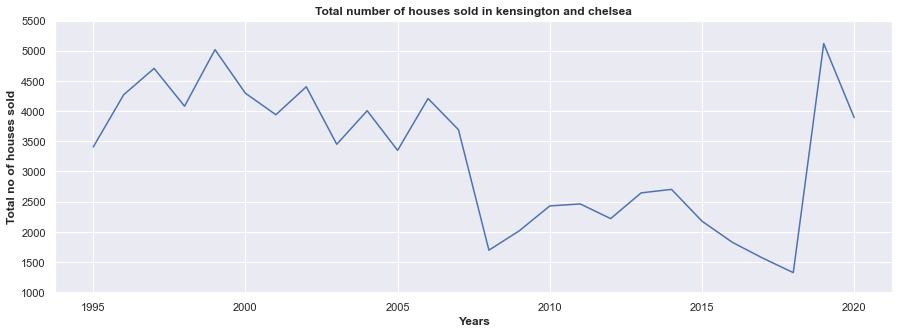

In [119]:
kenschel_hs_year = Kensington_chelsea.groupby('year')['houses_sold'].sum()

plt.figure(figsize = (15,5))
plt.plot(kenschel_hs_year.index,
         kenschel_hs_year.values)
plt.ylabel('Total no of houses sold', fontweight = 'bold')
plt.xlabel('Years', fontweight = 'bold')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Total number of houses sold in kensington and chelsea', fontsize = 12, fontweight = 'bold')
plt.show()

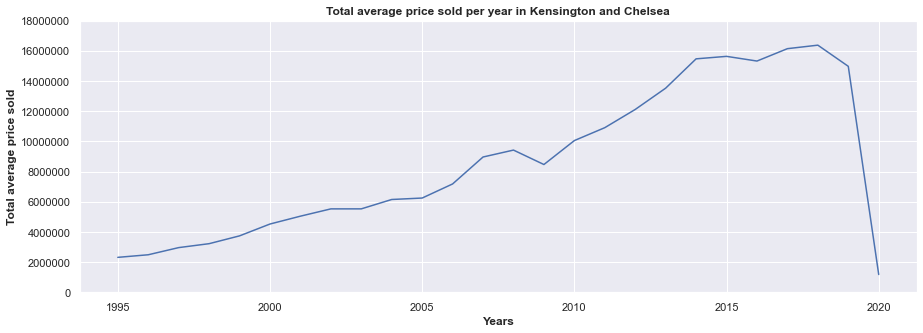

In [120]:
kenschel_avg_year = Kensington_chelsea.groupby('year')['average_price'].sum()

plt.figure(figsize = (15,5))
plt.plot(kenschel_avg_year.index,
         kenschel_avg_year.values)
plt.ylabel('Total average price sold', fontweight = 'bold')
plt.xlabel('Years', fontweight = 'bold')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Total average price sold per year in Kensington and Chelsea', fontsize = 12, fontweight = 'bold')
plt.show()

> *comparison of top 3 average sold areas:*
    > *(kensington and chelsea, westminster, camden )*

In [121]:
# creating variables for westminster and camden
Westminster = hs_data[hs_data['area'] == 'westminster']
Camden = hs_data[hs_data['area'] == 'camden']

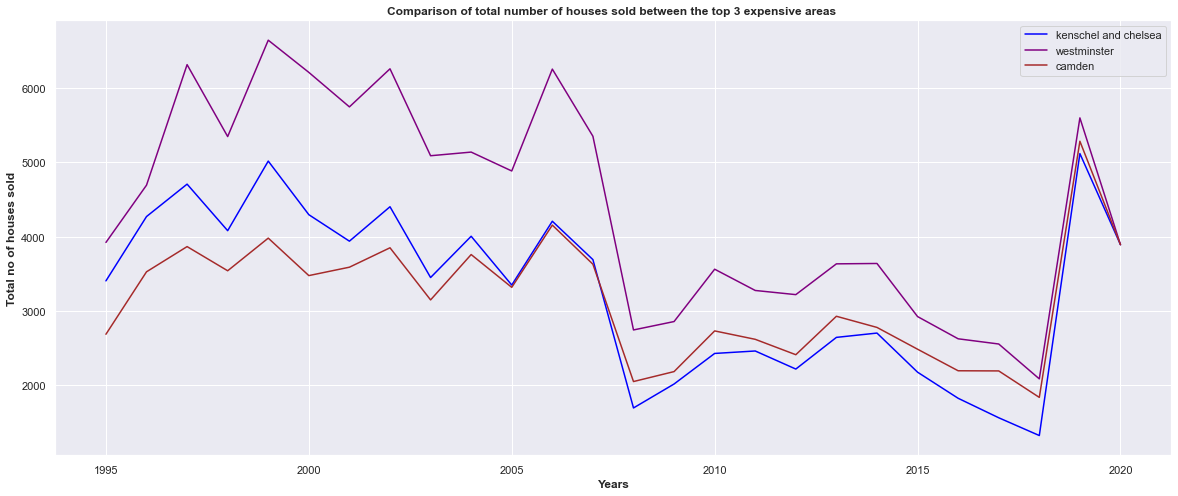

In [122]:
#no of houses sold
kenschel_hs_year = Kensington_chelsea.groupby('year')['houses_sold'].sum()
west_hs_year = Westminster.groupby('year')['houses_sold'].sum()
camden_hs_year = Camden.groupby('year')['houses_sold'].sum()

plt.figure(figsize = (20,8))
plt.plot(kenschel_hs_year.index,
         kenschel_hs_year.values,
         color = 'Blue',
         label = 'kenschel and chelsea')
plt.plot(west_hs_year.index,
         west_hs_year.values,
         color = 'Purple',
         label = 'westminster')
plt.plot(camden_hs_year.index,
         camden_hs_year.values,
         color = 'Brown',
         label = 'camden')
plt.legend()
plt.ylabel('Total no of houses sold', fontweight = 'bold')
plt.xlabel('Years', fontweight = 'bold')
plt.title('Comparison of total number of houses sold between the top 3 expensive areas ', fontsize = 12, fontweight = 'bold')
plt.show() 

- Finding no. of crimes per 'area'

In [123]:
#highest crime area by number
hs_data.groupby('area').no_of_crimes.sum().sort_values(ascending = False ).head(1)

area
westminster    1367119
Name: no_of_crimes, dtype: int32

In [124]:
#least crime area by number
hs_data.groupby('area').no_of_crimes.sum().sort_values(ascending = True ).head(1)

area
kingston upon thames    382496
Name: no_of_crimes, dtype: int32

In [125]:
#focusing on westmisnster 
westminster = hs_data[hs_data['area']== 'westminster']

- ***comparing (kingston) against (westminster)*** 
    > *houses sold*

In [126]:
#creating variables to compare data easily 
kingston = hs_data[hs_data['area'] == 'kingston upon thames']
k_hs = kingston.groupby('year')['houses_sold'].sum()
w_hs = westminster.groupby('year')['houses_sold'].sum()

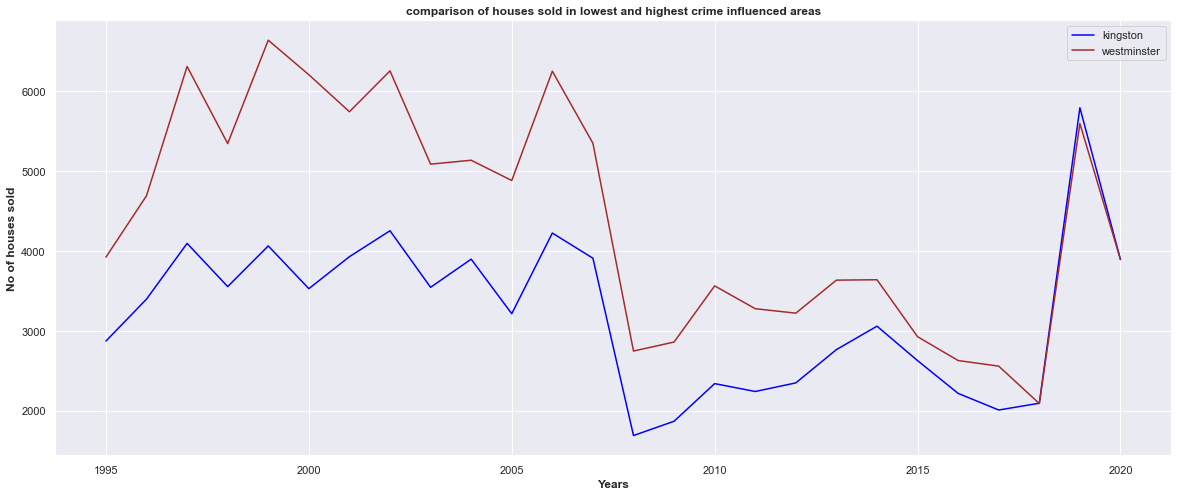

In [127]:
plt.figure(figsize = (20, 8))
plt.plot(k_hs.index,
         k_hs.values,
         color = 'Blue',
         label = 'kingston')
plt.plot(w_hs.index,
         w_hs.values,
         color = 'Brown',
         label = 'westminster')
plt.ylabel('No of houses sold', fontweight = 'bold')
plt.xlabel('Years', fontweight ='bold')
plt.legend()
plt.title('comparison of houses sold in lowest and highest crime influenced areas', fontweight = 'bold', fontsize = 12)
plt.show() 

> *average price sold per year*

In [128]:
k_avg = kingston.groupby('year')['average_price'].sum()
w_avg = westminster.groupby('year')['average_price'].sum()

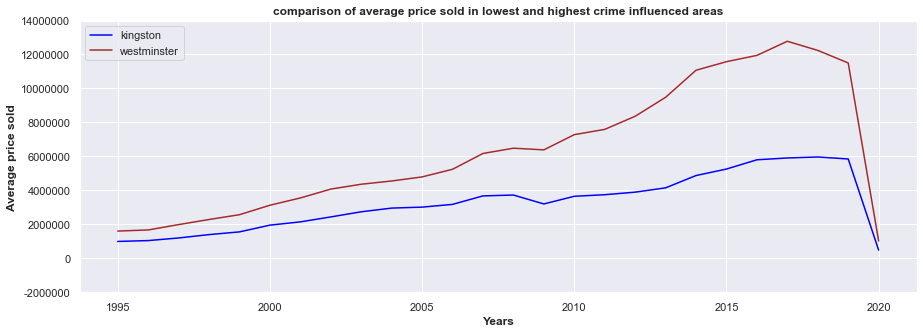

In [129]:
plt.figure(figsize = (15, 5))
plt.plot(k_avg.index,
         k_avg.values,
         color = 'Blue',
         label = 'kingston')
plt.plot(w_avg.index,
         w_avg.values,
         color = 'Brown',
         label ='westminster')
plt.ylabel('Average price sold', fontweight = 'bold')
plt.xlabel('Years', fontweight = 'bold')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.legend()
plt.title('comparison of average price sold in lowest and highest crime influenced areas', fontweight = 'bold', fontsize = 12)
plt.show()